# **Spam SMS Detection**

# Importing The libraries

In [ ]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Importing The Dataset

In [ ]:
df = pd.read_csv("spam.csv", encoding="latin-1")[['v1', 'v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Checking for Null Values

In [ ]:
df.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [ ]:
print(df.isnull().sum())

v1    0
v2    0
dtype: int64


## Changing The column Names for better Understanding

In [ ]:
df.columns = ['label', 'message']
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Conveting the column names To 0 and 1

In [ ]:
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Finding if there is any class imbalance or not

<ipython-input-304-3d7b2915f308>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette=['green', 'red'])


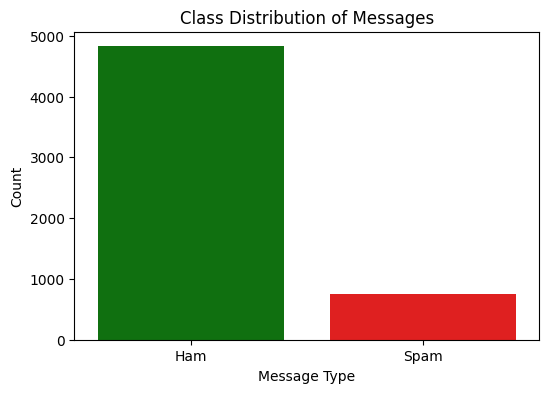

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette=['green', 'red'])
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("Class Distribution of Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()


# Applying Oversampling to reduce class imbalance problem

In [ ]:
spam_df = df[df['label'] == 1]
ham_df = df[df['label'] == 0]
spam_oversampled = resample(spam_df, replace=True, n_samples=len(ham_df), random_state=42)
df_balanced = pd.concat([spam_oversampled, ham_df]).sample(frac=1, random_state=42)  # Shuffle
print(df_balanced['label'].value_counts())


label
1    4825
0    4825
Name: count, dtype: int64


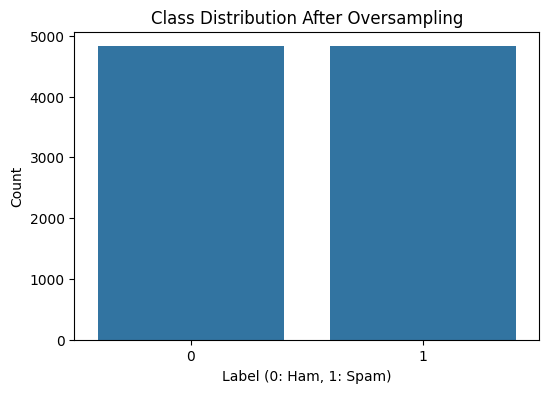

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_balanced['label'])
plt.title("Class Distribution After Oversampling")
plt.xlabel("Label (0: Ham, 1: Spam)")
plt.ylabel("Count")
plt.show()

# Removing numbers from message column

In [ ]:
df['message'] = df['message'].str.replace(r'\d+', '', regex=True)
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in a wkly comp to win FA Cup final...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the nd time we have tried contact u. ...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Removing Punctuations from message column

In [ ]:
df['message'] = df['message'].str.replace(r'[^\w\s]', '', regex=True)
df


,label,message
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in a wkly comp to win FA Cup final...
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives aroun...
...,...,...
5567,1,This is the nd time we have tried contact u U...
5568,0,Will Ì_ b going to esplanade fr home
5569,0,Pity was in mood for that Soany other suggest...
5570,0,The guy did some bitching but I acted like id ...


# Converting text to numerical features for training

In [ ]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['message']).toarray()
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Applying Logistic Regression model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# Printing Accuracy and Classification report

In [ ]:
y_pred = model.predict(X_test)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print Precision, Recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9623

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



# Visualization of Model Performance

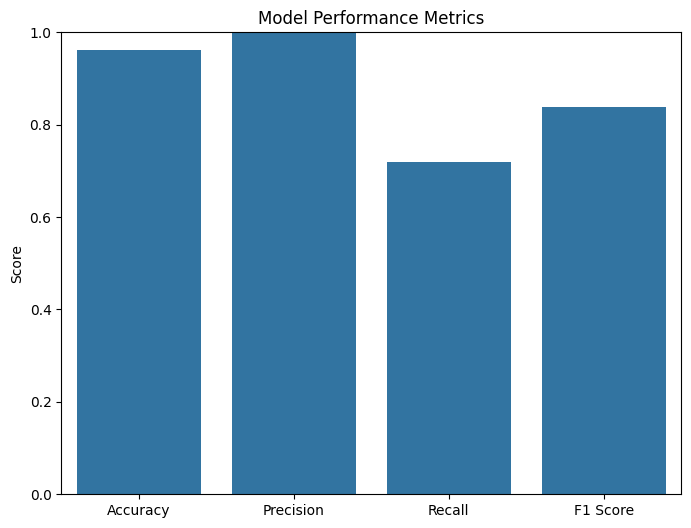

In [ ]:
# Ensure all metric values are floats
accuracy = float(accuracy_score(y_test, y_pred))
precision = float(precision_score(y_test, y_pred))
recall = float(recall_score(y_test, y_pred))
f1 = float(f1_score(y_test, y_pred))

# Plot the performance metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy, precision, recall, f1])
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()
